In [22]:
#### Analysis beer competition
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns


### Random data 
##### (here you should load the data of Joao)

In [23]:
### Random data
a = np.random.randint(2, size=100)
b = np.random.randint(2, size=100)

df = pd.DataFrame({'blind':a, 'seen':b})

subjects = ['alba', 'delfi', 'anna', 'sandra', 'david', 'mariona', 'rosa', 'joao', 'genis', 'albert']
b1 = ['heineken', 'heineken', 'heineken', 'heineken', 'e_dam', 'e_dam',   'e_dam',  'e_gal',  'e_gal',  'cruzcampo']
b2 = ['china',    'cruzcampo', 'e_gal',    'e_dam',   'china', 'cruzcampo', 'e_gal', 'china', 'cruzcampo', 'china']

subj_st = []
#comb = []
b1s = []
b2s = []


for s in subjects:
    subj_st.append([ s for x in range(0,10)])
    #comb.append([ str(i) for i in range(1,11)])    
    b1s.append(b1)
    b2s.append(b2)

df['subj'] = list(itertools.chain.from_iterable(subj_st))
#df['comb'] = list(itertools.chain.from_iterable(comb))
df['beer1'] = list(itertools.chain.from_iterable(b1s))
df['beer2'] = list(itertools.chain.from_iterable(b2s))

df.head(20)

,blind,seen,subj,comb,beer1,beer2
0,1,0,alba,1,heineken,china
1,1,0,alba,2,heineken,cruzcampo
2,1,1,alba,3,heineken,e_gal
3,1,0,alba,4,heineken,e_dam
4,0,0,alba,5,e_dam,china
5,1,1,alba,6,e_dam,cruzcampo
6,1,0,alba,7,e_dam,e_gal
7,0,0,alba,8,e_gal,china
8,0,1,alba,9,e_gal,cruzcampo
9,0,1,alba,10,cruzcampo,china


### Start of analysis

In [24]:
### Consistency between blind and seen (subjet and group level)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


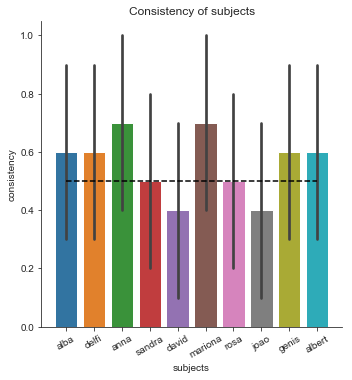

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


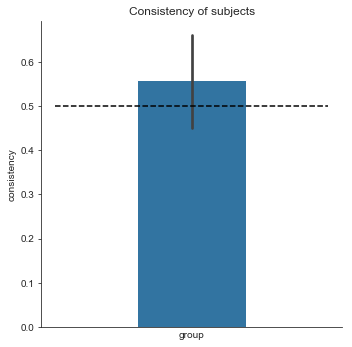

In [34]:
##
# column of consistency (1: you are consisten blind-seen, 0:not consistent)
## 0.5 is chance level


df['int'] = 1
df['consistency'] = abs( df['blind'] - df['seen'] )

## Subjcet consistency.
g= sns.factorplot(x='subj', y='consistency', kind='bar', data=df)
g.set_xticklabels(rotation=30)
plt.title('Consistency of subjects')
plt.xlabel('subjects')
plt.plot([0, len(df.subj.unique())-1], [0.5, 0.5], 'k--')
plt.show(block=False)

## Population consistency
## Subjcet consistency.
sns.factorplot(x='int', y='consistency', kind='bar', data=df)
plt.plot([-1, 1], [0.5, 0.5], 'k--')
plt.tick_params(axis='x',  which='both', bottom=False,  top=False,  labelbottom=False) 
plt.xlabel('group')
plt.title('Consistency of group')
plt.show(block=False)



### Beer score

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


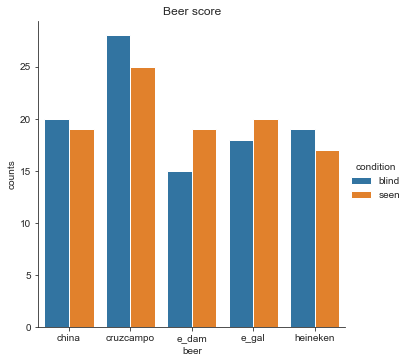

In [103]:
############
############## rank of beers by number of winning situations
############
order_list = [ 'china', 'cruzcampo',  'e_dam',  'e_gal', 'heineken' ]


blind_win=[]
seen_win=[]

for i in range(0, len(df)):
    ### blind
    res = df['blind'].iloc[i]
    if res == 0:
        blind_win.append(  df['beer1'].iloc[i]  )
    elif res==1:
        blind_win.append(  df['beer2'].iloc[i]  )
    
    ### seen
    res_s = df['seen'].iloc[i]
    if res_s == 0:
        seen_win.append(  df['beer1'].iloc[i]  )
    elif res_s ==1:
        seen_win.append(  df['beer2'].iloc[i]  )



df['blind_win'] = blind_win
df['seen_win'] = seen_win 


beers=[]
counts_b=[]
counts_s=[]
for beer in df['blind_win'].unique():
    beers.append(beer)
    counts_b.append( df.loc[df.blind_win == beer, 'blind_win'].count())
    counts_s.append( df.loc[df.seen_win == beer, 'seen_win'].count())


##   
df_b = pd.DataFrame({ 'beer':beers, 'counts': counts_b}) 
df_b['condition'] = 'blind'
#
df_s = pd.DataFrame({ 'beer':beers, 'counts': counts_s}) 
df_s['condition'] = 'seen'

df_b_s = pd.concat([df_b, df_s])



sns.factorplot(x='beer', y='counts', hue='condition', kind='bar', hue_order = ['blind', 'seen'], order=order_list, data=df_b_s)
plt.title('Beer score')
plt.show(block=False)

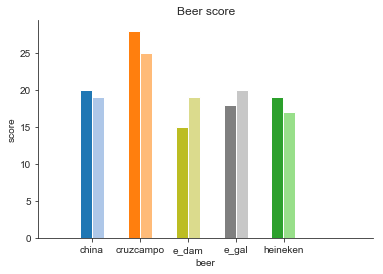

,beer,counts,condition,indx_plot
0,china,20,blind,0.00
0,china,19,seen,0.25
1,cruzcampo,28,blind,1.00
1,cruzcampo,25,seen,1.25
3,e_dam,15,blind,2.00
3,e_dam,19,seen,2.25
2,e_gal,18,blind,3.00
2,e_gal,20,seen,3.25
4,heineken,19,blind,4.00
4,heineken,17,seen,4.25


In [117]:
df_b['indx_plot']=df_b['beer'].copy()
df_b['indx_plot'] = df_b['indx_plot'].replace(order_list, [0, 1, 2, 3, 4])

df_s['indx_plot']=df_s['beer'].copy()
df_s['indx_plot'] = df_s['indx_plot'].replace(order_list, [0.25, 1.25, 2.25, 3.25, 4.25])


Colors = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']

Colors = ['#1f77b4', '#aec7e8','#ff7f0e', '#ffbb78', '#bcbd22', '#dbdb8d', '#7f7f7f', '#c7c7c7', '#2ca02c', '#98df8a']

#Colors =['#2ca02c', '#98df8a', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d', '#ff7f0e', '#ffbb78', '#1f77b4', '#aec7e8']


# '#e5d8bd', '#fddaec'
df_merge=pd.concat([df_b, df_s])

df_merge = df_merge.sort_values('beer')

plt.bar(df_merge['indx_plot'],df_merge['counts'], color=Colors , width=0.25)
plt.xticks( [0.12, 1.25-0.12, 2.25-0.12, 3.25-0.12, 4.25-0.12], order_list)
plt.title('Beer score')
plt.xlabel('beer')
plt.ylabel('score')
plt.xlim(-1, 6)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()


df_merge

,beer,counts,condition,indx_plot
0,china,20,blind,4.00
0,china,19,seen,4.25
1,cruzcampo,28,blind,3.00
1,cruzcampo,25,seen,3.25
3,e_dam,15,blind,2.00
3,e_dam,19,seen,2.25
2,e_gal,18,blind,1.00
2,e_gal,20,seen,1.25
4,heineken,19,blind,0.00
4,heineken,17,seen,0.25


## Social overrating and underrating 
##### (+ is social overrating and - social underrating, 0 means social rating reflects reality)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


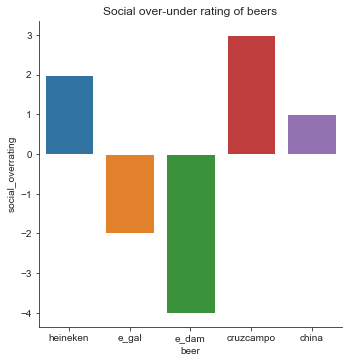

In [36]:
#####
df_bs = pd.DataFrame({ 'beer':beers, 'counts_b': counts_b, 'counts_s': counts_s}) 
df_bs['social_overrating'] = df_bs['counts_b'] - df_bs['counts_s']


sns.factorplot(x='beer', y='social_overrating', order=order_list, kind='bar', data=df_bs)
plt.title('Social over-under rating of beers') ## if +, the beer is socaily overrated. If -, it is socially underrated
plt.show(block=False)
        